# **Torch Bounding Box On Doodles**

In [1]:
import cv2
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os
import json
import shutil
import torch
import matplotlib.pyplot as plt

In [2]:
# check to see if torch is running on GPU
def check_torch():
    try:
        import torch
        if torch.cuda.is_available():
            print("torch is running on GPU")
        else:
            print("torch is running on CPU")
    except ImportError:
        print("torch is not installed")
        return False
    return True

# checking torch
if check_torch():
    print("torch is installed and running")

torch is running on GPU
torch is installed and running


In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

In [4]:
# training the model
model.train(
    data='/media/parker/Data_Drive/quick-draw-yolo/quickdraw.yaml',
    epochs=25,
    imgsz=640,
    batch=16,
    lr0=0.001,
    lrf=0.01,
    warmup_epochs=3,
    weight_decay=0.0005,
    momentum=0.937,
    optimizer='SGD',
    workers=4,
    device=0,
    mosaic=1.0,
    cache=False
)

Ultralytics 8.3.107 🚀 Python-3.9.21 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 5893MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/media/parker/Data_Drive/quick-draw-yolo/quickdraw.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /media/parker/Data_Drive/quick-draw-yolo/labels/train.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]
val: Scanning /media/parker/Data_Drive/quick-draw-yolo/labels/val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.05G      1.451      3.571      1.372        165        640: 100%|██████████| 625/625 [01:44<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.04it/s]


                   all       1000       5560      0.154      0.594      0.193      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.53G     0.8969      2.367      1.109        127        640: 100%|██████████| 625/625 [01:44<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]


                   all       1000       5560      0.465      0.669      0.531      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.53G     0.7458      1.733      1.032        140        640: 100%|██████████| 625/625 [01:44<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.19it/s]

                   all       1000       5560      0.715      0.775      0.807      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.54G     0.6621       1.39     0.9843        134        640: 100%|██████████| 625/625 [01:47<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]


                   all       1000       5560       0.82      0.851      0.904      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.56G     0.6022      1.224     0.9553        105        640: 100%|██████████| 625/625 [01:46<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.11it/s]


                   all       1000       5560      0.868      0.873      0.932      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.57G     0.5596      1.126     0.9386        147        640: 100%|██████████| 625/625 [01:45<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.44it/s]


                   all       1000       5560      0.887      0.892      0.946      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.58G     0.5301      1.062     0.9279        139        640: 100%|██████████| 625/625 [01:48<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.38it/s]


                   all       1000       5560      0.884       0.89      0.946      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.58G     0.5108      1.021     0.9208        104        640: 100%|██████████| 625/625 [01:46<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.67it/s]

                   all       1000       5560      0.861      0.881       0.94      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.58G     0.4915     0.9774     0.9145        154        640: 100%|██████████| 625/625 [01:44<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.59it/s]

                   all       1000       5560       0.92      0.921      0.965      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.58G     0.4776      0.963     0.9102        141        640: 100%|██████████| 625/625 [01:45<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.57it/s]


                   all       1000       5560      0.906      0.917      0.962      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.58G     0.4657     0.9304     0.9021        166        640: 100%|██████████| 625/625 [01:45<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.60it/s]

                   all       1000       5560      0.884      0.905      0.955      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.58G     0.4555     0.9162     0.8996        160        640: 100%|██████████| 625/625 [01:46<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.63it/s]

                   all       1000       5560       0.92      0.903      0.966      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.58G     0.4425     0.9063     0.8981        175        640: 100%|██████████| 625/625 [01:40<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.19it/s]

                   all       1000       5560      0.923      0.927       0.97      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.58G     0.4314     0.8855      0.893        130        640: 100%|██████████| 625/625 [01:39<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.17it/s]

                   all       1000       5560      0.925      0.928      0.972      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.58G     0.4229     0.8729     0.8905        110        640: 100%|██████████| 625/625 [01:39<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.24it/s]

                   all       1000       5560      0.933      0.923      0.973      0.952


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.58G     0.3274     0.7086     0.8544         81        640: 100%|██████████| 625/625 [01:37<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.19it/s]

                   all       1000       5560      0.936      0.926      0.974      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.58G     0.3126     0.6883     0.8483        101        640: 100%|██████████| 625/625 [01:38<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.20it/s]

                   all       1000       5560      0.937      0.931      0.975      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.58G     0.3006     0.6708     0.8446         94        640: 100%|██████████| 625/625 [01:36<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.26it/s]

                   all       1000       5560      0.944       0.93      0.976      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.58G     0.2954     0.6589     0.8444         90        640: 100%|██████████| 625/625 [01:37<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.16it/s]

                   all       1000       5560      0.925      0.935      0.974       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.58G      0.287     0.6489     0.8401         93        640: 100%|██████████| 625/625 [01:38<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.25it/s]

                   all       1000       5560      0.939      0.937      0.977      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.58G     0.2834     0.6379     0.8387         94        640: 100%|██████████| 625/625 [01:39<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.24it/s]

                   all       1000       5560      0.947      0.937      0.978      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.58G     0.2775     0.6312     0.8372         78        640: 100%|██████████| 625/625 [01:37<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.20it/s]

                   all       1000       5560      0.934      0.943      0.978      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.58G     0.2743     0.6272     0.8381         80        640: 100%|██████████| 625/625 [01:37<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.22it/s]

                   all       1000       5560      0.946      0.938      0.979      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.58G       0.27     0.6213     0.8375         83        640: 100%|██████████| 625/625 [01:37<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.23it/s]

                   all       1000       5560      0.939      0.943      0.978      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.58G     0.2641      0.618     0.8333         87        640: 100%|██████████| 625/625 [01:38<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.24it/s]

                   all       1000       5560      0.948      0.935      0.979      0.967



25 epochs completed in 0.748 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.9.21 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 5893MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.44it/s]


                   all       1000       5560      0.938      0.944      0.978      0.968
              campfire        407        492       0.96      0.974      0.987      0.977
                 cloud        371        453       0.96      0.965       0.99      0.989
             firetruck        367        444      0.843       0.87      0.931      0.925
            helicopter        358        457      0.939      0.974       0.99      0.977
              hospital        371        461      0.956      0.945      0.983      0.975
              mountain        386        475      0.977      0.976      0.992      0.983
                 skull        355        443      0.982      0.967      0.993      0.991
            skyscraper        384        471      0.963      0.947       0.98      0.951
               tractor        377        462      0.927      0.906      0.975      0.971
         traffic light        386        458      0.949      0.972      0.992      0.967
                  tre

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79fa5033b820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [5]:
# eval on test set
metrics = model.val()

Ultralytics 8.3.107 🚀 Python-3.9.21 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 5893MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /media/parker/Data_Drive/quick-draw-yolo/labels/val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.34it/s]


                   all       1000       5560      0.939      0.943      0.978      0.968
              campfire        407        492      0.962      0.974      0.988      0.978
                 cloud        371        453       0.96      0.965      0.991      0.989
             firetruck        367        444      0.846      0.867      0.931      0.925
            helicopter        358        457      0.939      0.974       0.99      0.977
              hospital        371        461      0.956      0.946      0.983      0.975
              mountain        386        475      0.977      0.976      0.992      0.983
                 skull        355        443      0.982      0.967      0.993      0.991
            skyscraper        384        471      0.963      0.946       0.98      0.949
               tractor        377        462      0.928      0.905      0.975       0.97
         traffic light        386        458      0.952      0.972      0.992      0.967
                  tre

In [ ]:
# loading the trained model
model = YOLO('runs/detect/train3/weights/best.pt')

In [ ]:
# run prediction on test set with stream
results = model.predict(
    source='/media/parker/Data_Drive/quick-draw-yolo/images/test',
    conf=0.3,
    stream=True
)

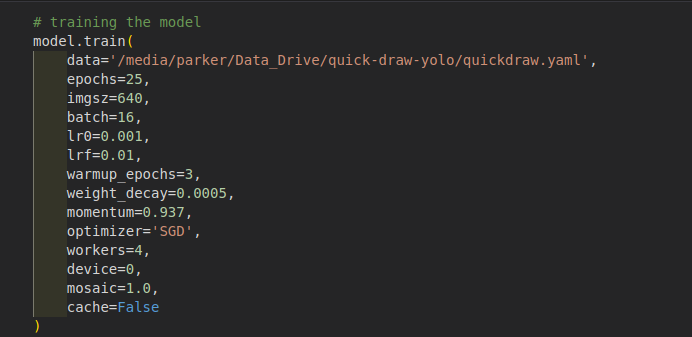